<시작하세요! 텐서플로 2.0 프로그래밍> 예제코드입니다.

- 예제 코드를 실행하기 위해서는 [파일] > [드라이브에 사본 저장]으로 본인의 계정에 사본을 만든 다음 실행하면 됩니다.
- 예제 코드는 [깃허브 저장소](https://github.com/wikibook/tf2)에서도 동일하게 제공됩니다. 예제에 대한 질문이나 책에 대한 질문은 깃허브 저장소의 [Issues](https://github.com/wikibook/tf2/issues)에 올려주세요.
- 각 장의 예제 파일은 처음부터 끝까지 실행하는 상황을 가정하고 작성되었습니다. 혹시 세션이 다운되는 등의 이유로 실행이 되지 않는 경우가 있다면, 필요한 라이브러리를 import 하신 후에 실행하시면 됩니다. (tensorflow, numpy, pandas 등)

In [ ]:
# 텐서플로 2 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf
import numpy as np

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


# 7.2 주요 레이어 정리

## 7.2.1 SimpleRNN 레이어

In [ ]:
# 7.1 SimpleRNN 레이어 생성 코드
rnn1 = tf.keras.layers.SimpleRNN(units=1, activation='tanh', return_sequences=True)

In [ ]:
# 7.2 시퀀스 예측 데이터 생성
X = []
Y = []
for i in range(6):
    # [0,1,2,3], [1,2,3,4] 같은 정수의 시퀀스를 만듭니다.
    lst = list(range(i,i+4))

    # 위에서 구한 시퀀스의 숫자들을 각각 10으로 나눈 다음 저장합니다.
    # SimpleRNN 에 각 타임스텝에 하나씩 숫자가 들어가기 때문에 여기서도 하나씩 분리해서 배열에 저장합니다.
    X.append(list(map(lambda c: [c/10], lst)))

    # 정답에 해당하는 4, 5 등의 정수를 역시 위처럼 10으로 나눠서 저장합니다.
    Y.append((i+4)/10)
    
X = np.array(X)
Y = np.array(Y)
for i in range(len(X)):
    print(X[i], Y[i])

[[0. ]
 [0.1]
 [0.2]
 [0.3]] 0.4
[[0.1]
 [0.2]
 [0.3]
 [0.4]] 0.5
[[0.2]
 [0.3]
 [0.4]
 [0.5]] 0.6
[[0.3]
 [0.4]
 [0.5]
 [0.6]] 0.7
[[0.4]
 [0.5]
 [0.6]
 [0.7]] 0.8
[[0.5]
 [0.6]
 [0.7]
 [0.8]] 0.9


In [ ]:
# 7.3 시퀀스 예측 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=10, return_sequences=False, input_shape=[4,1]),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 10)                120       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 7.4 네트워크 훈련 및 결과 확인
model.fit(X, Y, epochs=100, verbose=0)
print(np.shape(X))
print(model.predict(X))

(6, 4, 1)
1/1 [==============================] - 0s 220ms/step
[[0.39025816]
 [0.501847  ]
 [0.60755134]
 [0.7066053 ]
 [0.79981434]
 [0.8885553 ]]


In [ ]:
# 7.5 학습되지 않은 시퀀스에 대한 예측 결과
print(model.predict(np.array([[[0.6],[0.7],[0.8],[0.9]]])))
print(model.predict(np.array([[[-0.1],[0.0],[0.1],[0.2]]])))

1/1 [==============================] - 0s 19ms/step
[[0.97402054]]
1/1 [==============================] - 0s 18ms/step
[[0.27556396]]


## 7.2.2 LSTM 레이어

In [ ]:
# 7.6 곱셈 문제 데이터 생성
X = []
Y = []
for i in range(3000):
    # 0~1 사이의 랜덤한 숫자 100 개를 만듭니다.
    lst = np.random.rand(100)
    # 마킹할 숫자 2개의 인덱스를 뽑습니다.
    idx = np.random.choice(100, 2, replace=False)
    # 마킹 인덱스가 저장된 원-핫 인코딩 벡터를 만듭니다.
    zeros = np.zeros(100)
    zeros[idx] = 1
    # 마킹 인덱스와 랜덤한 숫자를 합쳐서 X 에 저장합니다.
    X.append(np.array(list(zip(zeros, lst))))
    # 마킹 인덱스가 1인 값들만 서로 곱해서 Y 에 저장합니다.
    Y.append(np.prod(lst[idx]))
    
print(X[0], Y[0])

[[0.         0.6382249 ]
 [0.         0.38670369]
 [0.         0.14922623]
 [0.         0.48728507]
 [0.         0.64150696]
 [0.         0.71478443]
 [0.         0.41690348]
 [0.         0.06130494]
 [0.         0.91057523]
 [0.         0.43861484]
 [0.         0.62894902]
 [0.         0.56104623]
 [0.         0.10572163]
 [0.         0.79952979]
 [0.         0.63035628]
 [0.         0.63680085]
 [0.         0.67185404]
 [0.         0.61215166]
 [0.         0.76806654]
 [0.         0.25125994]
 [0.         0.72738705]
 [0.         0.44868122]
 [0.         0.35293988]
 [0.         0.25721796]
 [0.         0.66747389]
 [0.         0.63933116]
 [1.         0.55637236]
 [0.         0.11837606]
 [0.         0.1040563 ]
 [0.         0.95372269]
 [0.         0.79121037]
 [0.         0.93289264]
 [0.         0.98653772]
 [0.         0.13065409]
 [0.         0.40871101]
 [0.         0.48924205]
 [0.         0.94570321]
 [0.         0.39999099]
 [0.         0.61891371]
 [0.         0.02725584]


In [ ]:
# 7.7 SimpleRNN 레이어를 사용한 곱셈 문제 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(units=30, return_sequences=True, input_shape=[100,2]),
    tf.keras.layers.SimpleRNN(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 100, 30)           990       
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 30)                1830      
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 2,851
Trainable params: 2,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 7.8 SimpleRNN 네트워크 학습
X = np.array(X)
Y = np.array(Y)
# 2560개의 데이터만 학습시킵니다. validation 데이터는 20% 로 지정합니다.
history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Epoch 1/100
64/64 [==============================] - 4s 42ms/step - loss: 0.0588 - val_loss: 0.0532
Epoch 2/100
64/64 [==============================] - 2s 36ms/step - loss: 0.0509 - val_loss: 0.0509
Epoch 3/100
64/64 [==============================] - 2s 36ms/step - loss: 0.0504 - val_loss: 0.0508
Epoch 4/100
64/64 [==============================] - 2s 36ms/step - loss: 0.0506 - val_loss: 0.0517
Epoch 5/100
64/64 [==============================] - 2s 36ms/step - loss: 0.0506 - val_loss: 0.0527
Epoch 6/100
64/64 [==============================] - 2s 36ms/step - loss: 0.0501 - val_loss: 0.0509
Epoch 7/100
64/64 [==============================] - 2s 36ms/step - loss: 0.0499 - val_loss: 0.0509
Epoch 8/100
64/64 [==============================] - 2s 35ms/step - loss: 0.0501 - val_loss: 0.0508
Epoch 9/100
64/64 [==============================] - 2s 36ms/step - loss: 0.0505 - val_loss: 0.0547
Epoch 10/100
64/64 [==============================] - 2s 35ms/step - loss: 0.0502 - val_loss: 0.0507

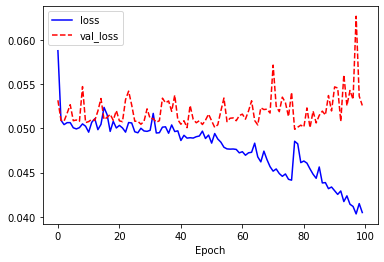

In [ ]:
# 7.9 SimpleRNN 네트워크 학습 결과 확인
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# 7.10 Test 데이터에 대한 예측 정확도 확인
model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560+5])
# 5개 테스트 데이터에 대한 예측을 표시합니다.
for i in range(5):
    print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]))
    
prediction = model.predict(X[2560:])
fail = 0
for i in range(len(prediction)):
    # 오차가 0.04 이상이면 오답입니다.
    if abs(prediction[i][0] - Y[2560+i]) > 0.04:
        fail += 1
print('correctness:', (440 - fail) / 440 * 100, '%')

1/1 [==============================] - 0s 259ms/step
0.1162097578656399 	 0.27171695 	diff: 0.15550719445827366
0.19848398653168728 	 0.30508453 	diff: 0.1066005400071616
0.05628569993520576 	 0.21438465 	diff: 0.15809894528841179
0.03480691558825324 	 0.28667453 	diff: 0.2518676137257879
0.022800598289235353 	 0.31104067 	diff: 0.28824007139040636
14/14 [==============================] - 0s 12ms/step
correctness: 9.772727272727273 %


In [ ]:
# 7.11 LSTM 레이어를 사용한 곱셈 문제 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=30, return_sequences=True, input_shape=[100,2]),
    tf.keras.layers.LSTM(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 30)           3960      
                                                                 
 lstm_1 (LSTM)               (None, 30)                7320      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 11,311
Trainable params: 11,311
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 7.12 LSTM 네트워크 학습
X = np.array(X)
Y = np.array(Y)
history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Epoch 1/100
64/64 [==============================] - 8s 79ms/step - loss: 0.0557 - val_loss: 0.0500
Epoch 2/100
64/64 [==============================] - 4s 63ms/step - loss: 0.0494 - val_loss: 0.0499
Epoch 3/100
64/64 [==============================] - 4s 65ms/step - loss: 0.0494 - val_loss: 0.0506
Epoch 4/100
64/64 [==============================] - 4s 64ms/step - loss: 0.0495 - val_loss: 0.0505
Epoch 5/100
64/64 [==============================] - 4s 63ms/step - loss: 0.0490 - val_loss: 0.0502
Epoch 6/100
64/64 [==============================] - 4s 63ms/step - loss: 0.0493 - val_loss: 0.0503
Epoch 7/100
64/64 [==============================] - 4s 63ms/step - loss: 0.0492 - val_loss: 0.0500
Epoch 8/100
64/64 [==============================] - 4s 64ms/step - loss: 0.0491 - val_loss: 0.0500
Epoch 9/100
64/64 [==============================] - 4s 63ms/step - loss: 0.0491 - val_loss: 0.0501
Epoch 10/100
64/64 [==============================] - 4s 63ms/step - loss: 0.0491 - val_loss: 0.0502

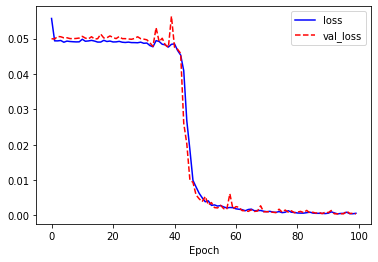

In [ ]:
# 7.13 LSTM 네트워크 학습 결과 확인
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# 7.14 Test 데이터에 대한 예측 정확도 확인
model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560+5])
for i in range(5):
    print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]))
    
prediction = model.predict(X[2560:])
cnt = 0
for i in range(len(prediction)):
    if abs(prediction[i][0] - Y[2560+i]) > 0.04:
        cnt += 1
print('correctness:', (440 - cnt) / 440 * 100, '%')

1/1 [==============================] - 1s 789ms/step
0.1162097578656399 	 0.14598909 	diff: 0.029779332338598988
0.19848398653168728 	 0.19867322 	diff: 0.00018923195700595863
0.05628569993520576 	 0.058790404 	diff: 0.0025047044143597444
0.03480691558825324 	 0.06369543 	diff: 0.028888515167361996
0.022800598289235353 	 0.029333517 	diff: 0.006532918666140319
14/14 [==============================] - 0s 20ms/step
correctness: 95.68181818181817 %


## 7.2.3 GRU 레이어

In [ ]:
# 7.15 GRU 레이어를 사용한 곱셈 문제 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.GRU(units=30, return_sequences=True, input_shape=[100,2]),
    tf.keras.layers.GRU(units=30),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 100, 30)           3060      
                                                                 
 gru_1 (GRU)                 (None, 30)                5580      
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 8,671
Trainable params: 8,671
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 7.16 GRU 네트워크 학습
X = np.array(X)
Y = np.array(Y)
history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Epoch 1/100
64/64 [==============================] - 7s 20ms/step - loss: 0.0492 - val_loss: 0.0533
Epoch 2/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0480 - val_loss: 0.0529
Epoch 3/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0469 - val_loss: 0.0530
Epoch 4/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0470 - val_loss: 0.0523
Epoch 5/100
64/64 [==============================] - 1s 9ms/step - loss: 0.0478 - val_loss: 0.0522
Epoch 6/100
64/64 [==============================] - 1s 9ms/step - loss: 0.0467 - val_loss: 0.0522
Epoch 7/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0469 - val_loss: 0.0524
Epoch 8/100
64/64 [==============================] - 1s 9ms/step - loss: 0.0472 - val_loss: 0.0520
Epoch 9/100
64/64 [==============================] - 1s 10ms/step - loss: 0.0466 - val_loss: 0.0517
Epoch 10/100
64/64 [==============================] - 1s 9ms/step - loss: 0.0467 - val_loss: 0.0531
Epo

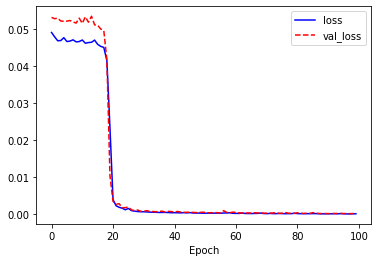

In [ ]:
# 7.17 GRU 네트워크 학습 결과 확인
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
# 7.18 Test 데이터에 대한 예측 정확도 확인
model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560+5])
for i in range(5):
    print(Y[2560+i], '\t', prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i]))
    
prediction = model.predict(X[2560:])
cnt = 0
for i in range(len(prediction)):
    if abs(prediction[i][0] - Y[2560+i]) > 0.04:
        cnt += 1
print('correctness:', (440 - cnt) / 440 * 100, '%')

14/14 [==============================] - 1s 9ms/step - loss: 1.3471e-04
0.38300888141964545 	 0.38484603 	diff: 0.0018371502461565492
0.23104388718279487 	 0.2346411 	diff: 0.0035972177538048655
0.09707748182332913 	 0.10267833 	diff: 0.005600846929188566
0.48207583355785905 	 0.47980088 	diff: 0.002274953602567298
0.4072524087138894 	 0.41243958 	diff: 0.005187176018166262
correctness: 98.18181818181819 %


# 7.3 긍정, 부정 감성 분석

In [ ]:
# 7.19 Naver Sentiment Movie Corpus v1.0 다운로드
path_to_train_file = tf.keras.utils.get_file('train.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt')
path_to_test_file = tf.keras.utils.get_file('test.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt')

4907008/4893335 [==============================] - 0s 0us/step


In [ ]:
# 7.20 데이터 로드 및 확인
# 데이터를 메모리에 불러옵니다. encoding 형식으로 utf-8 을 지정해야합니다.
train_text = open(path_to_train_file, 'rb').read().decode(encoding='utf-8')
test_text = open(path_to_test_file, 'rb').read().decode(encoding='utf-8')

# 텍스트가 총 몇 자인지 확인합니다.
print('Length of text: {} characters'.format(len(train_text)))
print('Length of text: {} characters'.format(len(test_text)))
print()

# 처음 300 자를 확인해봅니다.
print(train_text[:300])

Length of text: 6937271 characters
Length of text: 2318260 characters

id	document	label
9976970	아 더빙.. 진짜 짜증나네요 목소리	0
3819312	흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나	1
10265843	너무재밓었다그래서보는것을추천한다	0
9045019	교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정	0
6483659	사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다	1
5403919	막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.	0
7797314	원작의


In [ ]:
# 7.21 학습을 위한 정답 데이터(Y) 만들기
train_Y = np.array([[int(row.split('\t')[2])] for row in train_text.split('\n')[1:] if row.count('\t') > 0])
test_Y = np.array([[int(row.split('\t')[2])] for row in test_text.split('\n')[1:] if row.count('\t') > 0])
print(train_Y.shape, test_Y.shape)
print(train_Y[:5])

(150000, 1) (50000, 1)
[[0]
 [1]
 [0]
 [0]
 [1]]


In [ ]:
# 7.22 train 데이터의 입력(X)에 대한 정제(Cleaning)
import re
# From https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
def clean_str(string):    
    string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'{2,}", "\'", string)
    string = re.sub(r"\'", "", string)

    return string.lower()


train_text_X = [row.split('\t')[1] for row in train_text.split('\n')[1:] if row.count('\t') > 0]
train_text_X = [clean_str(sentence) for sentence in train_text_X]
# 문장을 띄어쓰기 단위로 단어 분리
sentences = [sentence.split(' ') for sentence in train_text_X]
for i in range(5):
    print(sentences[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조차', '가볍지', '않구나']
['너무재밓었다그래서보는것을추천한다']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그의', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨에서', '늙어보이기만', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


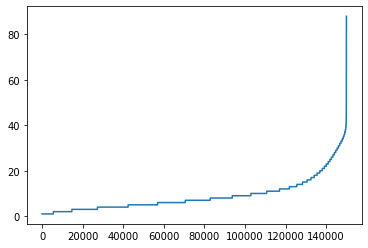

142587


In [ ]:
# 7.23 각 문장의 단어 길이 확인
import matplotlib.pyplot as plt
sentence_len = [len(sentence) for sentence in sentences]
sentence_len.sort()
plt.plot(sentence_len)
plt.show()

print(sum([int(l<=25) for l in sentence_len]))

In [ ]:
# 7.24 단어 정제 및 문장 길이 줄임
sentences_new = []
for sentence in sentences:
    sentences_new.append([word[:5] for word in sentence][:25])
sentences = sentences_new
for i in range(5):
    print(sentences[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조', '가볍지', '않구나']
['너무재밓었']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨', '늙어보이기', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


In [ ]:
# 7.25 Tokenizer와 pad_sequences를 사용한 문장 전처리
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(sentences)
train_X = tokenizer.texts_to_sequences(sentences)
train_X = pad_sequences(train_X, padding='post')

print(train_X[:5])

[[   25   884     8  5795  1111     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  588  5796  6697     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [   71   346    31    35 10468     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  106  5338     4     2  2169   869   573     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]]


In [ ]:
# 7.26 Tokenizer의 동작 확인
print(tokenizer.index_word[19999])
print(tokenizer.index_word[20000])
temp = tokenizer.texts_to_sequences(['#$#$#', '경우는', '잊혀질', '연기가'])
print(temp)
temp = pad_sequences(temp, padding='post')
print(temp)

경우는
잊혀질
[[], [19999], [], [106]]
[[    0]
 [19999]
 [    0]
 [  106]]


In [ ]:
# 7.27 감성 분석을 위한 모델 정의
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(20000, 300, input_length=25),
    tf.keras.layers.LSTM(units=50),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 300)           6000000   
                                                                 
 lstm (LSTM)                 (None, 50)                70200     
                                                                 
 dense_1 (Dense)             (None, 2)                 102       
                                                                 
Total params: 6,070,302
Trainable params: 6,070,302
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 7.28 감성 분석 모델 학습
history = model.fit(train_X, train_Y, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
938/938 [==============================] - 10s 9ms/step - loss: 0.4343 - accuracy: 0.7839 - val_loss: 0.3760 - val_accuracy: 0.8230
Epoch 2/5
938/938 [==============================] - 8s 9ms/step - loss: 0.3243 - accuracy: 0.8475 - val_loss: 0.3943 - val_accuracy: 0.8217
Epoch 3/5
938/938 [==============================] - 8s 9ms/step - loss: 0.2702 - accuracy: 0.8703 - val_loss: 0.4392 - val_accuracy: 0.8142
Epoch 4/5
938/938 [==============================] - 8s 9ms/step - loss: 0.2284 - accuracy: 0.8881 - val_loss: 0.4839 - val_accuracy: 0.8122
Epoch 5/5
938/938 [==============================] - 8s 9ms/step - loss: 0.1938 - accuracy: 0.9033 - val_loss: 0.5968 - val_accuracy: 0.8038


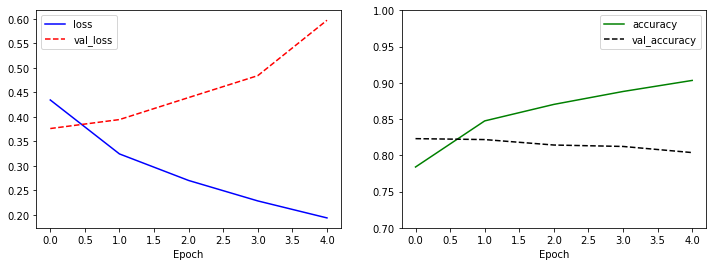

In [ ]:
# 7.29 감성 분석 모델 학습 결과 확인
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [ ]:
# 7.30 테스트 데이터 평가
test_text_X = [row.split('\t')[1] for row in test_text.split('\n')[1:] if row.count('\t') > 0]
test_text_X = [clean_str(sentence) for sentence in test_text_X]
sentences = [sentence.split(' ') for sentence in test_text_X]
sentences_new = []
for sentence in sentences:
    sentences_new.append([word[:5] for word in sentence][:25])
sentences = sentences_new

test_X = tokenizer.texts_to_sequences(sentences)
test_X = pad_sequences(test_X, padding='post')

model.evaluate(test_X, test_Y, verbose=0)

[0.606706976890564, 0.7994400262832642]

In [ ]:
# 7.31 임의의 문장 감성 분석 결과 확인
test_sentence = '재미있을 줄 알았는데 완전 실망했다. 너무 졸리고 돈이 아까웠다.'
test_sentence = test_sentence.split(' ')
test_sentences = []
now_sentence = []
for word in test_sentence:
    now_sentence.append(word)
    test_sentences.append(now_sentence[:])
    
test_X_1 = tokenizer.texts_to_sequences(test_sentences)
test_X_1 = pad_sequences(test_X_1, padding='post', maxlen=25)
prediction = model.predict(test_X_1)
for idx, sentence in enumerate(test_sentences):
    print(sentence)
    print(prediction[idx])

['재미있을']
[0.3562267 0.6437733]
['재미있을', '줄']
[0.3909217  0.60907835]
['재미있을', '줄', '알았는데']
[0.40896764 0.5910323 ]
['재미있을', '줄', '알았는데', '완전']
[0.44570118 0.5542989 ]
['재미있을', '줄', '알았는데', '완전', '실망했다.']
[0.44570118 0.5542989 ]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무']
[0.43488562 0.5651144 ]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고']
[0.9919979  0.00800207]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고', '돈이']
[9.9937743e-01 6.2262145e-04]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고', '돈이', '아까웠다.']
[9.9937743e-01 6.2262145e-04]


# 7.4 자연어 생성

## 7.4.1 단어 단위 생성

In [ ]:
# 7.32 조선왕조실록 데이터 파일 다운로드
path_to_file = tf.keras.utils.get_file('input.txt', 'http://bit.ly/2Mc3SOV')

62021632/62012502 [==============================] - 0s 0us/step


In [ ]:
# 7.33 데이터 로드 및 확인
# 데이터를 메모리에 불러옵니다. encoding 형식으로 utf-8 을 지정해야합니다.
train_text = open(path_to_file, 'rb').read().decode(encoding='utf-8')

# 텍스트가 총 몇 자인지 확인합니다.
print('Length of text: {} characters'.format(len(train_text)))
print()

# 처음 100 자를 확인해봅니다.
print(train_text[:100])

Length of text: 26265493 characters

﻿태조 이성계 선대의 가계. 목조 이안사가 전주에서 삼척·의주를 거쳐 알동에 정착하다 
태조 강헌 지인 계운 성문 신무 대왕(太祖康獻至仁啓運聖文神武大王)의 성은 이씨(李氏)요, 휘


In [ ]:
# 7.34 훈련 데이터 입력 정제
import re
# From https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py
def clean_str(string):    
    string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", "", string)
    string = re.sub(r"\)", "", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'{2,}", "\'", string)
    string = re.sub(r"\'", "", string)

    return string


train_text = train_text.split('\n')
train_text = [clean_str(sentence) for sentence in train_text]
train_text_X = []
for sentence in train_text:
    train_text_X.extend(sentence.split(' '))
    train_text_X.append('\n')
    
train_text_X = [word for word in train_text_X if word != '']

print(train_text_X[:20])

['태조', '이성계', '선대의', '가계', '목조', '이안사가', '전주에서', '삼척', '의주를', '거쳐', '알동에', '정착하다', '\n', '태조', '강헌', '지인', '계운', '성문', '신무', '대왕']


In [ ]:
# 7.35 단어 토큰화
# 단어의 set을 만듭니다.
vocab = sorted(set(train_text_X))
vocab.append('UNK')
print ('{} unique words'.format(len(vocab)))

# vocab list를 숫자로 맵핑하고, 반대도 실행합니다.
word2idx = {u:i for i, u in enumerate(vocab)}
idx2word = np.array(vocab)

text_as_int = np.array([word2idx[c] for c in train_text_X])

# word2idx 의 일부를 알아보기 쉽게 print 해봅니다.
print('{')
for word,_ in zip(word2idx, range(10)):
    print('  {:4s}: {:3d},'.format(repr(word), word2idx[word]))
print('  ...\n}')

print('index of UNK: {}'.format(word2idx['UNK']))

332640 unique words
{
  '\n':   0,
  '!' :   1,
  ',' :   2,
  '000명으로':   3,
  '001':   4,
  '002':   5,
  '003':   6,
  '004':   7,
  '005':   8,
  '006':   9,
  ...
}
index of UNK: 332639


In [ ]:
# 7.36 토큰 데이터 확인
print(train_text_X[:20])
print(text_as_int[:20])

['태조', '이성계', '선대의', '가계', '목조', '이안사가', '전주에서', '삼척', '의주를', '거쳐', '알동에', '정착하다', '\n', '태조', '강헌', '지인', '계운', '성문', '신무', '대왕']
[299305 229634 161443  17430 111029 230292 251081 155087 225462  29027
 190295 256129      0 299305  25624 273553  36147 163996 180466  84413]


In [ ]:
# 7.37 기본 데이터셋 만들기
seq_length = 25
examples_per_epoch = len(text_as_int) // seq_length
sentence_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

sentence_dataset = sentence_dataset.batch(seq_length+1, drop_remainder=True)
for item in sentence_dataset.take(1):
    print(idx2word[item.numpy()])
    print(item.numpy())

['태조' '이성계' '선대의' '가계' '목조' '이안사가' '전주에서' '삼척' '의주를' '거쳐' '알동에' '정착하다'
 '\n' '태조' '강헌' '지인' '계운' '성문' '신무' '대왕' '의' '성은' '이씨' '요' ',' '휘']
[299305 229634 161443  17430 111029 230292 251081 155087 225462  29027
 190295 256129      0 299305  25624 273553  36147 163996 180466  84413
 224182 164549 230248 210912      2 330313]


In [ ]:
# 7.38 학습 데이터셋 만들기
def split_input_target(chunk):
    return [chunk[:-1], chunk[-1]]

train_dataset = sentence_dataset.map(split_input_target)
for x,y in train_dataset.take(1):
    print(idx2word[x.numpy()])
    print(x.numpy())
    print(idx2word[y.numpy()])
    print(y.numpy())

['태조' '이성계' '선대의' '가계' '목조' '이안사가' '전주에서' '삼척' '의주를' '거쳐' '알동에' '정착하다'
 '\n' '태조' '강헌' '지인' '계운' '성문' '신무' '대왕' '의' '성은' '이씨' '요' ',']
[299305 229634 161443  17430 111029 230292 251081 155087 225462  29027
 190295 256129      0 299305  25624 273553  36147 163996 180466  84413
 224182 164549 230248 210912      2]
휘
330313


In [ ]:
# 7.39 데이터셋 shuffle, batch 설정
BATCH_SIZE = 512
steps_per_epoch = examples_per_epoch // BATCH_SIZE
BUFFER_SIZE = 10000

train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

In [ ]:
# 7.40 단어 단위 생성 모델 정의
total_words = len(vocab)
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(total_words, 100, input_length=seq_length),
    tf.keras.layers.LSTM(units=100, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units=100),
    tf.keras.layers.Dense(total_words, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 100)           33264000  
                                                                 
 lstm (LSTM)                 (None, 25, 100)           80400     
                                                                 
 dropout (Dropout)           (None, 25, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 332640)            33596640  
                                                                 
Total params: 67,021,440
Trainable params: 67,021,440
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 7.41 단어 단위 생성 모델 학습
from tensorflow.keras.preprocessing.sequence import pad_sequences

def testmodel(epoch, logs):
    if epoch % 5 != 0 and epoch != 49:
        return
    test_sentence = train_text[0]

    next_words = 100
    for _ in range(next_words):
        test_text_X = test_sentence.split(' ')[-seq_length:]
        test_text_X = np.array([word2idx[c] if c in word2idx else word2idx['UNK'] for c in test_text_X])
        test_text_X = pad_sequences([test_text_X], maxlen=seq_length, padding='pre', value=word2idx['UNK'])

        output_idx = model.predict_classes(test_text_X)
        test_sentence += ' ' + idx2word[output_idx[0]]
    
    print()
    print(test_sentence)
    print()

testmodelcb = tf.keras.callbacks.LambdaCallback(on_epoch_end=testmodel)

history = model.fit(train_dataset.repeat(), epochs=50, steps_per_epoch=steps_per_epoch, callbacks=[testmodelcb], verbose=2)

Epoch 1/50


KeyboardInterrupt: ignored

In [ ]:
# 7.42 임의의 문장을 사용한 생성 결과 확인
from tensorflow.keras.preprocessing.sequence import pad_sequences
test_sentence = '동헌에 나가 공무를 본 후 활 십오 순을 쏘았다'

next_words = 100
for _ in range(next_words):
    test_text_X = test_sentence.split(' ')[-seq_length:]
    test_text_X = np.array([word2idx[c] if c in word2idx else word2idx['UNK'] for c in test_text_X])
    test_text_X = pad_sequences([test_text_X], maxlen=seq_length, padding='pre', value=word2idx['UNK'])
    
    output_idx = model.predict_classes(test_text_X)
    test_sentence += ' ' + idx2word[output_idx[0]]

print(test_sentence)

동헌에 나가 공무를 본 후 활 십오 순을 쏘았다 그곳의 사로잡힌 대리하는 호군직 2개는 놓기도 토의 으로써 차임 되고 , 저들은 일시에 굳게 것으로서 주고 , 더욱 높은 바가 많아서 정위 라 같다 하는데 하였습니다 빈자 는 부의 에 도와서 알아야 하여 주소서 
 하니 , 형조 에서 교지 를 하사하고 충청도 도절제사 에서 다시 와서 와서 내려 쓸 하고 , 만일 잘 가는 것이 없었다 상수의 대한 한 한 뒤에 모두 능히 서로 알지 것은 감히 모두 모두 모두 사람을 죄를 죄를 사람을 죄를 온 한 사람을 삼가서 어질고 그믐날에 한다는 것이니 , 청컨대 이러한 정성을 알아서 난 를 정하여 급히 원하는 곳에 두고 특별히 징계하여 인도해 특별히


## 7.4.2 자소 단위 생성

In [ ]:
# 7.43 jamotools 설치
!pip install jamotools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 7.44 자모 분리 테스트
import jamotools

train_text = open(path_to_file, 'rb').read().decode(encoding='utf-8')
s = train_text[:100]
print(s)

# 한글 텍스트를 자모 단위로 분리해줍니다. 한자 등에는 영향이 없습니다.
s_split = jamotools.split_syllables(s)
print(s_split)

﻿태조 이성계 선대의 가계. 목조 이안사가 전주에서 삼척·의주를 거쳐 알동에 정착하다 
태조 강헌 지인 계운 성문 신무 대왕(太祖康獻至仁啓運聖文神武大王)의 성은 이씨(李氏)요, 휘
﻿ㅌㅐㅈㅗ ㅇㅣㅅㅓㅇㄱㅖ ㅅㅓㄴㄷㅐㅇㅢ ㄱㅏㄱㅖ. ㅁㅗㄱㅈㅗ ㅇㅣㅇㅏㄴㅅㅏㄱㅏ ㅈㅓㄴㅈㅜㅇㅔㅅㅓ ㅅㅏㅁㅊㅓㄱ·ㅇㅢㅈㅜㄹㅡㄹ ㄱㅓㅊㅕ ㅇㅏㄹㄷㅗㅇㅇㅔ ㅈㅓㅇㅊㅏㄱㅎㅏㄷㅏ 
ㅌㅐㅈㅗ ㄱㅏㅇㅎㅓㄴ ㅈㅣㅇㅣㄴ ㄱㅖㅇㅜㄴ ㅅㅓㅇㅁㅜㄴ ㅅㅣㄴㅁㅜ ㄷㅐㅇㅘㅇ(太祖康獻至仁啓運聖文神武大王)ㅇㅢ ㅅㅓㅇㅇㅡㄴ ㅇㅣㅆㅣ(李氏)ㅇㅛ, ㅎㅟ


In [ ]:
# 7.45 자모 결합 테스트
s2 = jamotools.join_jamos(s_split)
print(s2)
print(s == s2)

﻿태조 이성계 선대의 가계. 목조 이안사가 전주에서 삼척·의주를 거쳐 알동에 정착하다 
태조 강헌 지인 계운 성문 신무 대왕(太祖康獻至仁啓運聖文神武大王)의 성은 이씨(李氏)요, 휘
True


In [ ]:
# 7.46 자모 토큰화
# 텍스트를 자모 단위로 나눕니다. 데이터가 크기 때문에 약간 시간이 걸립니다.
train_text_X = jamotools.split_syllables(train_text)
vocab = sorted(set(train_text_X))
vocab.append('UNK')
print ('{} unique characters'.format(len(vocab)))

# vocab list를 숫자로 맵핑하고, 반대도 실행합니다.
char2idx = {u:i for i, u in enumerate(vocab)}
idx2char = np.array(vocab)

text_as_int = np.array([char2idx[c] for c in train_text_X])

# word2idx 의 일부를 알아보기 쉽게 print 해봅니다.
print('{')
for char,_ in zip(char2idx, range(10)):
    print('  {:4s}: {:3d},'.format(repr(char), char2idx[char]))
print('  ...\n}')

print('index of UNK: {}'.format(char2idx['UNK']))

6198 unique characters
{
  '\n':   0,
  ' ' :   1,
  '!' :   2,
  '"' :   3,
  "'" :   4,
  '(' :   5,
  ')' :   6,
  '+' :   7,
  ',' :   8,
  '-' :   9,
  ...
}
index of UNK: 6197


In [ ]:
# 7.47 토큰 데이터 확인
print(train_text_X[:20])
print(text_as_int[:20])

﻿ㅌㅐㅈㅗ ㅇㅣㅅㅓㅇㄱㅖ ㅅㅓㄴㄷㅐㅇ
[6158   83   87   79   94    1   78  106   76   90   78   56   93    1
   76   90   59   62   87   78]


In [ ]:
# 7.48 학습 데이터세트 생성
seq_length = 80
examples_per_epoch = len(text_as_int) // seq_length
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)

char_dataset = char_dataset.batch(seq_length+1, drop_remainder=True)
for item in char_dataset.take(1):
    print(idx2char[item.numpy()])
    print(item.numpy())
    
def split_input_target(chunk):
    return [chunk[:-1], chunk[-1]]

train_dataset = char_dataset.map(split_input_target)
for x,y in train_dataset.take(1):
    print(idx2char[x.numpy()])
    print(x.numpy())
    print(idx2char[y.numpy()])
    print(y.numpy())
    
BATCH_SIZE = 256
steps_per_epoch = examples_per_epoch // BATCH_SIZE
BUFFER_SIZE = 10000

train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

['\ufeff' 'ㅌ' 'ㅐ' 'ㅈ' 'ㅗ' ' ' 'ㅇ' 'ㅣ' 'ㅅ' 'ㅓ' 'ㅇ' 'ㄱ' 'ㅖ' ' ' 'ㅅ' 'ㅓ' 'ㄴ'
 'ㄷ' 'ㅐ' 'ㅇ' 'ㅢ' ' ' 'ㄱ' 'ㅏ' 'ㄱ' 'ㅖ' '.' ' ' 'ㅁ' 'ㅗ' 'ㄱ' 'ㅈ' 'ㅗ' ' ' 'ㅇ'
 'ㅣ' 'ㅇ' 'ㅏ' 'ㄴ' 'ㅅ' 'ㅏ' 'ㄱ' 'ㅏ' ' ' 'ㅈ' 'ㅓ' 'ㄴ' 'ㅈ' 'ㅜ' 'ㅇ' 'ㅔ' 'ㅅ' 'ㅓ'
 ' ' 'ㅅ' 'ㅏ' 'ㅁ' 'ㅊ' 'ㅓ' 'ㄱ' '·' 'ㅇ' 'ㅢ' 'ㅈ' 'ㅜ' 'ㄹ' 'ㅡ' 'ㄹ' ' ' 'ㄱ' 'ㅓ'
 'ㅊ' 'ㅕ' ' ' 'ㅇ' 'ㅏ' 'ㄹ' 'ㄷ' 'ㅗ' 'ㅇ' 'ㅇ']
[6158   83   87   79   94    1   78  106   76   90   78   56   93    1
   76   90   59   62   87   78  105    1   56   86   56   93   10    1
   72   94   56   79   94    1   78  106   78   86   59   76   86   56
   86    1   79   90   59   79   99   78   91   76   90    1   76   86
   72   81   90   56   36   78  105   79   99   64  104   64    1   56
   90   81   92    1   78   86   64   62   94   78   78]
['\ufeff' 'ㅌ' 'ㅐ' 'ㅈ' 'ㅗ' ' ' 'ㅇ' 'ㅣ' 'ㅅ' 'ㅓ' 'ㅇ' 'ㄱ' 'ㅖ' ' ' 'ㅅ' 'ㅓ' 'ㄴ'
 'ㄷ' 'ㅐ' 'ㅇ' 'ㅢ' ' ' 'ㄱ' 'ㅏ' 'ㄱ' 'ㅖ' '.' ' ' 'ㅁ' 'ㅗ' 'ㄱ' 'ㅈ' 'ㅗ' ' ' 'ㅇ'
 'ㅣ' 'ㅇ' 'ㅏ' 'ㄴ' 'ㅅ' 'ㅏ' 'ㄱ' 'ㅏ' ' ' 'ㅈ' 'ㅓ' 'ㄴ' 'ㅈ' 'ㅜ' 'ㅇ' 'ㅔ' 'ㅅ' 'ㅓ'
 ' ' 'ㅅ' 'ㅏ' 'ㅁ' 'ㅊ' 'ㅓ' 'ㄱ' '·' 

In [ ]:
# 7.49 자소 단위 생성 모델 정의
total_chars = len(vocab)
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(total_chars, 100, input_length=seq_length),
    tf.keras.layers.LSTM(units=400),
    tf.keras.layers.Dense(total_chars, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 80, 100)           619800    
                                                                 
 lstm_2 (LSTM)               (None, 400)               801600    
                                                                 
 dense_1 (Dense)             (None, 6198)              2485398   
                                                                 
Total params: 3,906,798
Trainable params: 3,906,798
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 7.50 자소 단위 생성 모델 학습
from tensorflow.keras.preprocessing.sequence import pad_sequences

def testmodel(epoch, logs):
    if epoch % 5 != 0 and epoch != 99:
        return
    
    test_sentence = train_text[:48]
    test_sentence = jamotools.split_syllables(test_sentence)

    next_chars = 300
    for _ in range(next_chars):
        test_text_X = test_sentence[-seq_length:]
        test_text_X = np.array([char2idx[c] if c in char2idx else char2idx['UNK'] for c in test_text_X])
        test_text_X = pad_sequences([test_text_X], maxlen=seq_length, padding='pre', value=char2idx['UNK'])

        output_idx = model.predict_classes(test_text_X)
        test_sentence += idx2char[output_idx[0]]
    
    print()
    print(jamotools.join_jamos(test_sentence))
    print()

testmodelcb = tf.keras.callbacks.LambdaCallback(on_epoch_end=testmodel)

history = model.fit(train_dataset.repeat(), epochs=100, steps_per_epoch=steps_per_epoch, callbacks=[testmodelcb], verbose=2)

Epoch 1/100


KeyboardInterrupt: ignored

In [ ]:
# 7.51 임의의 문장을 사용한 생성 결과 확인
from tensorflow.keras.preprocessing.sequence import pad_sequences
test_sentence = '동헌에 나가 공무를 본 후 활 십오 순을 쏘았다'
test_sentence = jamotools.split_syllables(test_sentence)

next_chars = 300
for _ in range(next_chars):
    test_text_X = test_sentence[-seq_length:]
    test_text_X = np.array([char2idx[c] if c in char2idx else char2idx['UNK'] for c in test_text_X])
    test_text_X = pad_sequences([test_text_X], maxlen=seq_length, padding='pre', value=char2idx['UNK'])
    
    output_idx = model.predict_classes(test_text_X)
    test_sentence += idx2char[output_idx[0]]
    

print(jamotools.join_jamos(test_sentence))

동헌에 나가 공무를 본 후 활 십오 순을 쏘았다. 임금이 말하기를,
"이보다 큰 공상은 그 집에 돌아오다
정사를 보았다. 임금이 말하기를,
"이방성을 아뢰다
함길도 감사가 이미 나라를 행하였다.상왕이 그 사람을 금하다
임금이 말하기를,
"이보다 큰 공상은 그 집에 돌아온다. 【모든 것을 보내어 여러 관원은 농산ㄱ
